# Laporan Proyek Machine Learning - Sistem Rekomendasi Film
-- Mohammad Harry Khomas Saputra --

# Project Overview

Sistem rekomendasi film telah menjadi elemen penting dalam industri hiburan modern. Sistem ini dirancang untuk memberikan pengalaman yang lebih personal kepada pengguna dengan menyarankan film yang relevan sesuai dengan preferensi mereka. Layanan seperti Netflix, iQIYI, dan WeTV adalah contoh platform yang sukses mengimplementasikan sistem rekomendasi untuk meningkatkan keterlibatan pengguna serta kepuasan pelanggan.

Tantangan dalam menemukan film yang sesuai dengan preferensi pengguna sering kali menjadi kendala, terutama ketika pengguna dihadapkan dengan ribuan pilihan film. Hal ini dapat menyebabkan kelelahan dalam memilih dan mengurangi pengalaman pengguna. Oleh karena itu, pengembangan sistem rekomendasi sangat penting untuk membantu mengatasi masalah ini. Dengan sistem rekomendasi yang baik, pengguna dapat dengan mudah menemukan film yang sesuai dengan selera mereka tanpa harus mencari secara manual.

Proyek ini bertujuan untuk memberikan solusi inovatif melalui penerapan algoritma machine learning yang dapat memahami preferensi pengguna berdasarkan data historis mereka. Sistem ini tidak hanya akan meningkatkan pengalaman pengguna tetapi juga membantu platform film dalam meningkatkan keterlibatan pengguna, memperpanjang durasi penggunaan layanan, dan pada akhirnya meningkatkan loyalitas pelanggan. Dengan pendekatan Content-Based Filtering dan Collaborative Filtering, sistem rekomendasi ini menawarkan fleksibilitas dan relevansi tinggi dalam memenuhi kebutuhan pengguna.

# Business Understanding
**Problem Statements**



*   Bagaimana merekomendasikan film yang sesuai dengan preferensi pengguna berdasarkan data historis?
*   Bagaimana meningkatkan akurasi rekomendasi film?

# Goals

*   Membuat sistem rekomendasi yang memudahkan pengguna dalam mendapatkan rekomendasi film yang relevan berdasarkan data historis dan kategori konten.
*   Meningkatkan akurasi rekomendasi film dengan menerapkan algoritma Content-Based Filtering dan Collaborative Filtering.
*   Mengukur keberhasilan sistem rekomendasi menggunakan metrik evaluasi yang sesuai, seperti precision dan RMSE.

# Solution Approach

1.   Content-Based Filtering:

  *   Memanfaatkan metadata film (genre, deskripsi) untuk memberikan rekomendasi berdasarkan kesamaan dengan film yang disukai pengguna sebelumnya.
2.   Collaborative Filtering:
  *   Menggunakan data historis dari interaksi pengguna untuk merekomendasikan film yang telah disukai pengguna lain dengan pola preferensi serupa.



In [1]:
!pip install opendatasets

In [2]:
from google.colab import files
files.upload()  # Unggah file kaggle.json Anda

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"putrab13","key":"e9af8a023f5459bf4b0894f2afd98a47"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/rohan4050/movie-recommendation-data')

Dataset URL: https://www.kaggle.com/datasets/rohan4050/movie-recommendation-data


100%|██████████| 13.1M/13.1M [00:00<00:00, 58.6MB/s]


# Data Understanding

# Informasi Dataset

## Dataset terdiri dari empat file utama:
- **links.csv**: Daftar tautan film.
- **movies.csv**: Metadata film (judul, genre).
- **ratings.csv**: Rating yang diberikan oleh pengguna.
- **tags.csv**: Kata kunci terkait film.

## Jumlah Data
- **links.csv**: 9,742 baris dan 3 kolom.
- **movies.csv**: 9,742 baris dan 3 kolom.
- **ratings.csv**: 100,836 baris dan 4 kolom.
- **tags.csv**: 14,531 baris dan 4 kolom.

## Kondisi Data
### Missing Value:
- **tags.csv**: Kolom `tag` memiliki nilai kosong.
- **ratings.csv**: Tidak memiliki nilai kosong.
- **movies.csv** dan **links.csv**: Lengkap tanpa nilai kosong.

### Duplikasi:
- Tidak ditemukan duplikasi pada dataset utama.

### Outlier:
- Skala rating berkisar antara **0.5 hingga 5**, sesuai dengan rentang normal rating pengguna.

## Tautan Sumber Data
Dataset dapat diakses melalui tautan berikut: [Movie Recommendation Dataset](https://www.kaggle.com/datasets/rohan4050/movie-recommendation-data?select=ml-latest-small).

## Uraian Fitur Dataset
### links.csv
- **movieId**: ID unik untuk setiap film.
- **imdbId**: ID film pada platform IMDb.
- **tmdbId**: ID film pada platform TMDb.

### movies.csv
- **movieId**: ID unik untuk setiap film.
- **title**: Judul film.
- **genres**: Kategori genre yang terkait dengan film, dipisahkan oleh tanda `|`.

### ratings.csv
- **userId**: ID unik untuk setiap pengguna.
- **movieId**: ID unik untuk setiap film.
- **rating**: Nilai rating yang diberikan oleh pengguna (0.5 hingga 5).
- **timestamp**: Waktu pemberian rating.

### tags.csv
- **userId**: ID unik untuk setiap pengguna.
- **movieId**: ID unik untuk setiap film.
- **tag**: Tag atau kata kunci yang diberikan oleh pengguna.
- **timestamp**: Waktu pemberian tag.


## Import Library


In [5]:
import pandas as pd
import numpy as np

*  pandas: Library untuk manipulasi dan analisis data, termasuk membaca, menulis, dan memproses file berbasis tabel (seperti CSV).
*  numpy: Library untuk operasi numerik yang efisien, sering digunakan untuk perhitungan matematis dalam array.

# Exploratory Data Analysis
## Membaca File CSV

In [6]:
links = pd.read_csv('/content/movie-recommendation-data/ml-latest-small/links.csv')
movies = pd.read_csv('/content/movie-recommendation-data/ml-latest-small/movies.csv')
ratings = pd.read_csv('/content/movie-recommendation-data/ml-latest-small/ratings.csv')
tags = pd.read_csv('/content/movie-recommendation-data/ml-latest-small/tags.csv')

## Menampilkan Informasi Dataset

Kode ini digunakan untuk menampilkan informasi detail tentang struktur dataset, seperti jumlah baris, kolom, tipe data, dan apakah terdapat nilai yang hilang (missing values).

In [7]:

print(links.info())
print(movies.info())
print(ratings.info())
print(tags.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 no

## Analisis Genre pada Dataset Film

Kode ini memisahkan genre, menampilkan setiap genre sebagai baris baru, dan menghitung jumlah kemunculannya. Berikut adalah hasilnya:

In [8]:
genre_counts = movies['genres'].str.split('|').explode().value_counts()
print(genre_counts)


genres
Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: count, dtype: int64


## Visualisasi Distribusi Rating

Tahap ini bertujuan untuk memahami distribusi rating yang diberikan pengguna dalam dataset ratings.

<Axes: title={'center': 'Distribusi Rating'}, ylabel='Frequency'>

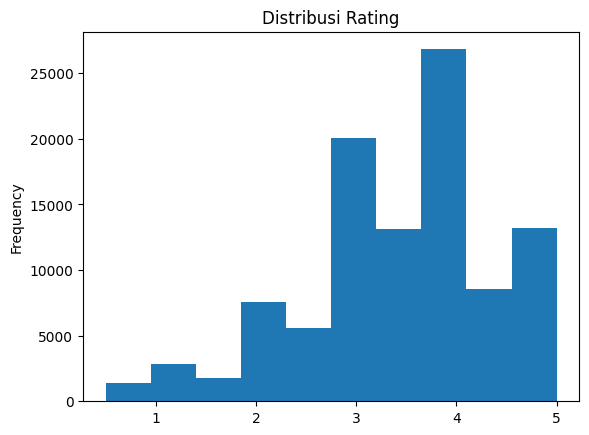

In [9]:
ratings['rating'].plot(kind='hist', bins=10, title='Distribusi Rating')

Grafik diatas menunjukkan distribusi rating yang diberikan oleh pengguna terhadap film.

# Data Preprocessing
## Mengatasi Missing Value
Langkah ini bertujuan untuk membersihkan dataset dari nilai kosong (missing value) pada kolom yang relevan. Menghapus missing value membantu memastikan analisis data dan pemodelan menjadi lebih akurat.

In [10]:
# Hapus missing value pada dataset
movies_clean = movies.dropna()
ratings_clean = ratings.dropna()
tags_clean = tags.dropna()

print("Jumlah data setelah menghapus missing value:")
print(f"Movies: {len(movies_clean)}")
print(f"Ratings: {len(ratings_clean)}")
print(f"Tags: {len(tags_clean)}")


Jumlah data setelah menghapus missing value:
Movies: 9742
Ratings: 100836
Tags: 3683


## Menggabungkan Dataset

**Gabungkan data berdasarkan movieId.**

Langkah ini bertujuan untuk menggabungkan beberapa dataset (ratings, movies, dan tags) menjadi satu DataFrame yang utuh. Dataset gabungan ini mempermudah analisis dan pemodelan di tahap selanjutnya.

In [11]:
# Gabungkan data ratings dengan movies
movie_info = pd.merge(ratings_clean, movies_clean[['movieId', 'title', 'genres']], on='movieId', how='left')

# Gabungkan movie_info dengan tags
full_data = pd.merge(movie_info, tags_clean[['movieId', 'tag']], on='movieId', how='left')
full_data = full_data.dropna()  # Hapus nilai kosong setelah penggabungan

print("Data setelah penggabungan:")
print(full_data.head())


Data setelah penggabungan:
   userId  movieId  rating  timestamp                    title  \
0       1        1     4.0  964982703         Toy Story (1995)   
1       1        1     4.0  964982703         Toy Story (1995)   
2       1        1     4.0  964982703         Toy Story (1995)   
3       1        3     4.0  964981247  Grumpier Old Men (1995)   
4       1        3     4.0  964981247  Grumpier Old Men (1995)   

                                        genres    tag  
0  Adventure|Animation|Children|Comedy|Fantasy  pixar  
1  Adventure|Animation|Children|Comedy|Fantasy  pixar  
2  Adventure|Animation|Children|Comedy|Fantasy    fun  
3                               Comedy|Romance  moldy  
4                               Comedy|Romance    old  


## Menggabungkan Seluruh Movie ID

Langkah ini bertujuan untuk menggabungkan semua movieId dari keempat dataset (links, movies, ratings, dan tags) agar menghasilkan daftar lengkap ID film yang unik.

In [12]:
# Menggabungkan seluruh movieID
movie_all = np.concatenate((
    links.movieId.unique(),
    movies.movieId.unique(),
    ratings.movieId.unique(),
    tags.movieId.unique(),
))

movie_all = np.sort(np.unique(movie_all))
print('Jumlah data by movieID: ', len(movie_all))

Jumlah data by movieID:  9742


## Menggabungkan Seluruh User ID

Langkah ini bertujuan untuk menggabungkan semua userId dari dataset ratings dan tags sehingga menghasilkan daftar lengkap ID pengguna yang unik.

In [13]:
user_all = np.concatenate((
    ratings.userId.unique(),
    tags.userId.unique(),
))

user_all = np.sort(np.unique(user_all))
print('Jumlah data user: ', len(user_all))

Jumlah data user:  610


## Penggabungan Data Menggunakan Concat dan Merge

Menggabungkan data dari beberapa dataset (links, movies, ratings, dan tags) menjadi satu dataset utuh yang berisi informasi lengkap untuk setiap film.

In [14]:
movie_info = pd.concat([links, movies, ratings, tags])
movie = pd.merge(ratings, movie_info , on='movieId', how='left')
movie

,userId_x,movieId,rating_x,timestamp_x,imdbId,tmdbId,title,genres,userId_y,rating_y,timestamp_y,tag
0,1,1,4.0,964982703,114709.0,862.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4.0,964982703,NaN,NaN,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,NaN,NaN
2,1,1,4.0,964982703,NaN,NaN,NaN,NaN,1.0,4.0,9.649827e+08,NaN
3,1,1,4.0,964982703,NaN,NaN,NaN,NaN,5.0,4.0,8.474350e+08,NaN
4,1,1,4.0,964982703,NaN,NaN,NaN,NaN,7.0,4.5,1.106636e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6359580,610,170875,3.0,1493846415,4630562.0,337339.0,NaN,NaN,NaN,NaN,NaN,NaN
6359581,610,170875,3.0,1493846415,NaN,NaN,The Fate of the Furious (2017),Action|Crime|Drama|Thriller,NaN,NaN,NaN,NaN
6359582,610,170875,3.0,1493846415,NaN,NaN,NaN,NaN,50.0,1.0,1.514498e+09,NaN
6359583,610,170875,3.0,1493846415,NaN,NaN,NaN,NaN,249.0,3.0,1.505165e+09,NaN


Memeriksa jumlah nilai kosong (missing value) pada setiap kolom di dataset movie.

In [15]:
movie.isnull().sum()

,0
userId_x,0
movieId,0
rating_x,0
timestamp_x,0
imdbId,6258749
tmdbId,6258762
title,6258749
genres,6258749
userId_y,201672
rating_y,434885


Dari output di atas, diketahui bahwa dataset hasil penggabungan memiliki jumlah nilai kosong (missing values) yang cukup signifikan di beberapa kolom. Kolom seperti userId_x, movieId, rating_x, dan timestamp_x tidak memiliki nilai kosong, yang berarti data ini lengkap. Namun, kolom seperti imdbId, tmdbId, title, dan genres memiliki lebih dari **6,258,000** nilai kosong, menunjukkan bahwa sebagian besar film tidak memiliki informasi tambahan seperti ID IMDb, ID TMDb, judul, atau genre. Selain itu, kolom seperti userId_y, rating_y, dan timestamp_y juga memiliki ribuan nilai kosong, dengan masing-masing sebanyak **201,672** hingga **434,885** nilai kosong. Kolom tag menunjukkan jumlah nilai kosong terbesar, yaitu **6,126,372**, yang mengindikasikan sebagian besar film tidak memiliki informasi tag yang relevan. Oleh karena itu, langkah data cleaning sangat diperlukan, baik dengan menghapus baris atau kolom yang memiliki banyak nilai kosong, atau menggunakan metode imputasi untuk melengkapi data yang hilang, agar analisis dan pemodelan dapat memberikan hasil yang optimal.

## Mengelompokkan dan Menjumlahkan Data Berdasarkan Movie ID
Langkah ini bertujuan untuk mengelompokkan data berdasarkan kolom movieId dan menjumlahkan nilai pada kolom numerik untuk setiap grup.

In [16]:
movie.groupby('movieId').sum()

,userId_x,rating_x,timestamp_x,imdbId,tmdbId,title,genres,userId_y,rating_y,timestamp_y,tag
movieId,,,,,,,,,,,
1,14498880,185460.0,53441180205380,24662435.0,185330.0,Toy Story (1995)Toy Story (1995)Toy Story (199...,Adventure|Animation|Children|Comedy|FantasyAdv...,14465415.0,181245.0,5.304394e+13,pixarpixarfunpixarpixarfunpixarpixarfunpixarpi...
2,4205116,43790.0,14492875665352,12484670.0,972840.0,Jumanji (1995)Jumanji (1995)Jumanji (1995)Juma...,Adventure|Children|FantasyAdventure|Children|F...,4060210.0,41525.0,1.437287e+13,fantasymagic board gameRobin Williamsgamefanta...
3,825832,9492.0,2926881125616,5887856.0,811304.0,Grumpier Old Men (1995)Grumpier Old Men (1995)...,Comedy|RomanceComedy|RomanceComedy|RomanceCome...,796900.0,8814.0,2.836734e+12,moldyoldmoldyoldmoldyoldmoldyoldmoldyoldmoldyo...
4,13851,148.5,56610468432,804195.0,219499.0,Waiting to Exhale (1995)Waiting to Exhale (199...,Comedy|Drama|RomanceComedy|Drama|RomanceComedy...,10773.0,115.5,4.403036e+10,0
5,777987,7976.5,2577949287482,5539009.0,581238.0,Father of the Bride Part II (1995)Father of th...,ComedyComedyComedyComedyComedyComedyComedyCome...,765723.0,7374.5,2.494850e+12,pregnancyremakepregnancyremakepregnancyremakep...
...,...,...,...,...,...,...,...,...,...,...,...
193581,552,12.0,4611327246,5476944.0,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0,1.537109e+09,0
193583,552,10.5,4611328635,5914996.0,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5,1.537110e+09,0
193585,552,10.5,4611329415,6397426.0,479308.0,Flint (2017),Drama,184.0,3.5,1.537110e+09,0


## Membuat Salinan Data

Pada langkah ini, kita membuat salinan dataset ratings dan menyimpannya dalam variabel baru bernama all_movie_rate.

In [17]:
all_movie_rate = ratings
all_movie_rate

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


## Menggabungkan Dataset Ratings dengan Movies

Langkah ini bertujuan untuk menggabungkan dataset all_movie_rate dengan dataset movies sehingga setiap rating memiliki informasi tambahan seperti judul (title) dan genre (genres) film.

In [18]:
all_movie_name = pd.merge(all_movie_rate, movies[['movieId','title','genres']], on='movieId', how='left')
all_movie_name

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


## Menggabungkan Dataset dengan Tags

Langkah ini bertujuan untuk menggabungkan dataset all_movie_name dengan dataset tags sehingga setiap film memiliki informasi tambahan berupa tag yang diberikan pengguna.

In [19]:

all_movie = pd.merge(all_movie_name, tags[['movieId','tag']], on='movieId', how='left')
all_movie

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,moldy
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,old
...,...,...,...,...,...,...,...
285757,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,emotional
285758,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,gritty
285759,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,heartbreaking
285760,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,predictible plot


# Data Preparation
## Memeriksa Missing Value dalam Dataset Gabungan

Langkah ini bertujuan untuk memeriksa jumlah nilai kosong (missing value) di setiap kolom dataset all_movie.

In [20]:
all_movie.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0
title,0
genres,0
tag,52549


## Menghapus Missing Value dalam Dataset

Langkah ini bertujuan untuk menghapus baris yang memiliki nilai kosong (missing value) dalam dataset all_movie, sehingga menghasilkan dataset yang bersih tanpa nilai kosong.

In [21]:
all_movie_clean = all_movie.dropna()
all_movie_clean


,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,moldy
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,old
...,...,...,...,...,...,...,...
285756,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,dark
285757,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,emotional
285758,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,gritty
285759,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,heartbreaking


Periksa kembali jumlah nilai kosong (missing value) di setiap kolom dataset all_movie

In [22]:
all_movie_clean.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0
title,0
genres,0
tag,0


##Mengurutkan Data Berdasarkan Movie ID

Langkah ini bertujuan untuk mengurutkan dataset all_movie_clean berdasarkan kolom movieId dalam urutan menaik (ascending), sehingga memudahkan analisis atau pemrosesan data lebih lanjut.

In [23]:
fix_movie = all_movie_clean.sort_values('movieId', ascending=True)
fix_movie

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121430,275,1,5.0,1049076484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121431,275,1,5.0,1049076484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121432,275,1,5.0,1049076484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
35190,73,1,4.5,1464196374,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
...,...,...,...,...,...,...,...
263644,586,187595,5.0,1529899556,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,star wars
81531,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,anime
81532,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,comedy
81534,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,remaster


## Menghitung Jumlah Film Unik

Langkah ini bertujuan untuk menghitung jumlah film unik dalam dataset fix_movie berdasarkan kolom movieId.

In [24]:

len(fix_movie.movieId.unique())

1554

## Menyiapkan Dataset untuk Pemrosesan Selanjutnya

Langkah ini bertujuan untuk membuat salinan dataset fix_movie ke variabel baru preparation dan memastikan dataset tetap diurutkan berdasarkan kolom movieId.

In [25]:
preparation = fix_movie
preparation.sort_values('movieId')

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
44427,98,1,4.5,1532457849,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
44426,98,1,4.5,1532457849,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
44425,98,1,4.5,1532457849,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
209733,453,1,5.0,1005966797,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
...,...,...,...,...,...,...,...
191470,414,187595,3.5,1527977920,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,star wars
81534,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,remaster
81531,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,anime
81532,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,comedy


## Menghapus Duplikasi Data Berdasarkan Movie ID
Langkah ini bertujuan untuk menghapus baris duplikat dalam dataset preparation berdasarkan kolom movieId, sehingga setiap film hanya memiliki satu baris data.

In [26]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('movieId')
preparation

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
187260,414,2,3.0,961594981,Jumanji (1995),Adventure|Children|Fantasy,fantasy
106951,240,3,4.0,849122858,Grumpier Old Men (1995),Comedy|Romance,old
19921,45,5,3.0,959625102,Father of the Bride Part II (1995),Comedy,pregnancy
115692,262,7,3.0,840306238,Sabrina (1995),Comedy|Romance,remake
...,...,...,...,...,...,...,...
27632,62,183611,4.0,1526244681,Game Night (2018),Action|Comedy|Crime|Horror,Comedy
174264,380,184471,3.0,1536872748,Tomb Raider (2018),Action|Adventure|Fantasy,Alicia Vikander
44721,98,187593,5.0,1532457913,Deadpool 2 (2018),Action|Comedy|Sci-Fi,sarcasm
263643,586,187595,5.0,1529899556,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,Emilia Clarke


## Mengonversi Data Series ke Dalam Bentuk List
Langkah ini bertujuan untuk mengubah kolom tertentu dari dataset preparation menjadi list Python agar lebih mudah digunakan dalam pemrosesan lebih lanjut, seperti pemodelan atau analisis.

In [27]:
movie_id = preparation['movieId'].tolist()
movie_name = preparation['title'].tolist()
movie_genre = preparation['genres'].tolist()

print('Jumlah data series movieId: ', len(movie_id))
print('Jumlah data series title: ', len(movie_name))
print('Jumlah data series genres: ', len(movie_genre))

Jumlah data series movieId:  1554
Jumlah data series title:  1554
Jumlah data series genres:  1554


## Membuat Dictionary untuk Film
Langkah ini bertujuan untuk membuat DataFrame baru yang merepresentasikan dictionary dari data film, dengan memetakan movie_id, movie_name, dan movie_genre dalam satu struktur data yang rapi.

In [28]:
# Membuat dictionary untuk data ‘movie_id’, ‘movie_name’, dan ‘movie_genre’
movie_new = pd.DataFrame({
    'id': movie_id,
    'movie_name': movie_name,
    'genre': movie_genre
})
movie_new

,id,movie_name,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,5,Father of the Bride Part II (1995),Comedy
4,7,Sabrina (1995),Comedy|Romance
...,...,...,...
1549,183611,Game Night (2018),Action|Comedy|Crime|Horror
1550,184471,Tomb Raider (2018),Action|Adventure|Fantasy
1551,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi
1552,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi


# Modeling and Result

Proses pemodelan yang dilakukan dalam proyek ini melibatkan penerapan dua algoritma machine learning, yaitu **Content-Based Filtering** dan **Collaborative Filtering**. Algoritma Content-Based Filtering digunakan untuk merekomendasikan film berdasarkan preferensi pengguna sebelumnya dengan menganalisis kesamaan karakteristik film yang disukai. Sementara itu, Collaborative Filtering diterapkan untuk memberikan rekomendasi berdasarkan pola interaksi dan penilaian dari pengguna lain yang memiliki preferensi serupa. Pendekatan ini memungkinkan sistem rekomendasi menjadi lebih personal dan relevan.

## Menggunakan TF-IDF untuk Genre Film

Langkah ini bertujuan untuk menghitung TF-IDF (Term Frequency-Inverse Document Frequency) dari kolom genre dalam dataset movie_new. TF-IDF digunakan untuk merepresentasikan genre film dalam bentuk numerik yang dapat diproses oleh model machine learning.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data genre
tf.fit(movie_new['genre'])

# Mapping array dari fitur index integer ke fitur nama
feature_names = tf.get_feature_names_out()
print(feature_names)


['action' 'adventure' 'animation' 'children' 'comedy' 'crime'
 'documentary' 'drama' 'fantasy' 'fi' 'film' 'genres' 'horror' 'imax'
 'listed' 'musical' 'mystery' 'no' 'noir' 'romance' 'sci' 'thriller' 'war'
 'western']


## Menghitung dan Memeriksa Matriks TF-IDF

Langkah ini bertujuan untuk menghitung representasi numerik TF-IDF dari kolom genre dalam dataset movie_new dan memeriksa dimensi (bentuk) matriks yang dihasilkan.

In [30]:
tfidf_matrix = tf.fit_transform(movie_new['genre'])
tfidf_matrix.shape

(1554, 24)

## Mengubah Sparse Matrix TF-IDF Menjadi Dense Matrix
Langkah ini bertujuan untuk mengubah matriks TF-IDF yang dihasilkan dalam format sparse matrix menjadi dense matrix agar lebih mudah dibaca dan divisualisasikan.

In [31]:
tfidf_matrix.todense()

matrix([[0.        , 0.3983147 , 0.52247057, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.49497089, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.49413097, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.39639614, 0.40792706, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41107716, 0.        , 0.55489644, ..., 0.        , 0.        ,
         0.        ]])

## Membuat DataFrame dari Matriks TF-IDF

Langkah ini bertujuan untuk mengubah matriks TF-IDF menjadi DataFrame pandas, sehingga lebih mudah untuk dibaca, dianalisis, dan divisualisasikan.

In [32]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=movie_new['movie_name']
).sample(22, axis=1).sample(10, axis=0)

,romance,documentary,western,drama,war,listed,genres,adventure,imax,children,...,horror,thriller,film,action,animation,fi,mystery,no,fantasy,comedy
movie_name,,,,,,,,,,,,,,,,,,,,,
High Fidelity (2000),0.690993,0.0,0.0,0.433964,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.578103
In Love and War (1996),0.531232,0.0,0.0,0.000000,0.847226,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
Harry Potter and the Prisoner of Azkaban (2004),0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.439419,0.727386,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.527087,0.000000
"Babadook, The (2014)",0.000000,0.0,0.0,0.319676,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.777936,0.540947,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
"Night at the Opera, A (1935)",0.492697,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.412204
Gentlemen Broncos (2009),0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.000000
Europa Europa (Hitlerjunge Salomon) (1990),0.000000,0.0,0.0,0.366404,0.930456,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
How to Steal a Million (1966),0.563272,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.471248
"Definitely, Maybe (2008)",0.690993,0.0,0.0,0.433964,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.578103


## Menghitung Cosine Similarity

Langkah ini bertujuan untuk menghitung Cosine Similarity antar film berdasarkan nilai TF-IDF dari genre. Cosine Similarity digunakan untuk menentukan tingkat kesamaan antara dua film.


cosine_similarity(tfidf_matrix):

Menghitung Cosine Similarity antar baris dalam matriks TF-IDF (tfidf_matrix).
Cosine Similarity adalah metrik yang mengukur kesamaan antara dua vektor berdasarkan sudut kosinusnya:


$$\text{Cosine Similarity} = \frac{\mathbf{A} \cdot \mathbf{B}}{||\mathbf{A}|| \times ||\mathbf{B}||}$$


Nilai berkisar dari 0 hingga 1:
*  1: Vektor (film) identik.
*  0: Tidak ada kesamaan antara vektor (film).

cosine_sim:

*  Matriks dua dimensi (2D) dengan bentuk (n, n), di mana n adalah jumlah film.
*  Baris dan kolom merepresentasikan film.
*  Setiap elemen [i, j] menunjukkan tingkat kesamaan antara film i dan film j.


In [33]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.80472348, 0.1808617 , ..., 0.10142228, 0.42942348,
        0.37429223],
       [0.80472348, 1.        , 0.        , ..., 0.        , 0.53362862,
        0.        ],
       [0.1808617 , 0.        , 1.        , ..., 0.23089549, 0.        ,
        0.19208644],
       ...,
       [0.10142228, 0.        , 0.23089549, ..., 1.        , 0.6983388 ,
        0.83191943],
       [0.42942348, 0.53362862, 0.        , ..., 0.6983388 , 1.        ,
        0.58096161],
       [0.37429223, 0.        , 0.19208644, ..., 0.83191943, 0.58096161,
        1.        ]])

## Membuat DataFrame dari Cosine Similarity
Langkah ini bertujuan untuk mengubah matriks Cosine Similarity menjadi DataFrame pandas, sehingga lebih mudah untuk dianalisis dan dimanipulasi.

In [34]:

cosine_sim_df = pd.DataFrame(cosine_sim, index=movie_new['movie_name'], columns=movie_new['movie_name'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (1554, 1554)


movie_name,Unbreakable (2000),Ghost (1990),American Movie (1999),"Deer Hunter, The (1978)",Gone Girl (2014)
movie_name,,,,,
Memento (2000),0.000000,0.283370,0.0,0.000000,0.525224
Akira (1988),0.597010,0.000000,0.0,0.000000,0.000000
Stripes (1981),0.000000,0.169865,0.0,0.823964,0.000000
Hoosiers (a.k.a. Best Shot) (1986),0.171789,0.516107,0.0,0.194869,0.270580
"Paper, The (1994)",0.193915,0.457218,0.0,0.219968,0.305429
The Hobbit: The Battle of the Five Armies (2014),0.000000,0.476085,0.0,0.000000,0.000000
Deliver Us from Evil (2006),0.000000,0.000000,1.0,0.000000,0.000000
Big Daddy (1999),0.000000,0.365657,0.0,0.000000,0.000000
"Wings of the Dove, The (1997)",0.171789,0.516107,0.0,0.194869,0.270580


## Membuat Fungsi Rekomendasi Film
Fungsi ini digunakan untuk memberikan rekomendasi film berdasarkan kesamaan (Cosine Similarity) antar film yang dihitung sebelumnya.

In [35]:
def movie_recommendations(nama_movie, similarity_data=cosine_sim_df, items=movie_new[['movie_name', 'genre']], k=5):


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_movie].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_movie agar nama movie yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_movie, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [39]:
movie_new[movie_new.movie_name.eq('Memento (2000)')]

,id,movie_name,genre
799,4226,Memento (2000),Mystery|Thriller


Kode ini digunakan untuk memberikan rekomendasi film berdasarkan kesamaan (Cosine Similarity) dengan film 'Jumanji (1995)'.

In [40]:
movie_recommendations('Memento (2000)')

,movie_name,genre
0,Rear Window (1954),Mystery|Thriller
1,Old Boy (2003),Mystery|Thriller
2,"Vanishing, The (1993)",Mystery|Thriller
3,Just Cause (1995),Mystery|Thriller
4,Missing (1982),Drama|Mystery|Thriller


Dari hasil rekomendasi di atas, sistem memberikan lima film yang memiliki kesamaan dengan film "Jumanji (1995)" berdasarkan genre. Film-film yang direkomendasikan memiliki genre yang serupa, yaitu Adventure, Children, dan Fantasy, yang merupakan genre utama dari "Jumanji (1995)"

## Import Library
import library yang diperlukan untuk berbagai tahap dalam proyek, seperti manipulasi data, pembangunan model, dan visualisasi.

In [41]:

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

## Menyimpan Dataset Ratings
Menyimpan dataset ratings ke dalam variabel baru (df) agar lebih mudah diakses dan dimanipulasi selama proses analisis dan pemodelan.

In [42]:
df = ratings
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Dataset ratings terdiri dari **100,836** baris dan 4 kolom: userId, movieId, rating, dan timestamp. Kolom userId merepresentasikan ID unik untuk setiap pengguna, sedangkan kolom movieId adalah ID unik untuk setiap film yang dirating oleh pengguna. Kolom rating mencatat nilai rating yang diberikan oleh pengguna untuk film, dengan rentang nilai dari 0.5 hingga 5.0. Kolom timestamp berisi waktu dalam format UNIX timestamp yang menunjukkan kapan rating tersebut diberikan. Misalnya, pengguna dengan userId 1 memberikan rating 4.0 untuk film dengan movieId 1 pada waktu 964982703, dan rating lain untuk beberapa film berbeda seperti movieId 3 dan movieId 6. Data ini mencakup informasi interaksi antara pengguna dan film yang penting untuk analisis. Kolom rating menjadi kunci utama dalam memahami preferensi pengguna, sementara kolom timestamp dapat digunakan untuk melihat pola perubahan preferensi pengguna seiring waktu. Dataset ini siap untuk digunakan dalam pengembangan sistem rekomendasi, khususnya dengan pendekatan Collaborative Filtering.

## Encoding userId
Langkah ini bertujuan untuk mengubah data userId menjadi bentuk yang lebih mudah diproses dalam model machine learning, yaitu encoding berupa angka.

In [45]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['userId'].unique().tolist()
print('list userID: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)



list userID:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

## Encoding movieId dan Mapping ke DataFrame
Langkah ini bertujuan untuk mengubah data movieId menjadi bentuk numerik yang lebih mudah diproses dalam model machine learning, dan memetakan hasil encoding ke DataFrame.

In [46]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = df['movieId'].unique().tolist()

# Melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

# Memetakan userId dan movieId ke dataframe yang berkaitan.

# Mapping userId ke dataframe genres
df['genres'] = df['userId'].map(user_to_user_encoded)

# Mapping movieD ke dataframe movies
df['movies'] = df['movieId'].map(movie_to_movie_encoded)

## Mengecek Jumlah Pengguna, Film, dan Skala Rating
Langkah ini bertujuan untuk mendapatkan informasi dasar tentang data pengguna, film, dan skala rating yang ada dalam dataset.

In [47]:
num_users = len(user_to_user_encoded)
print(num_users)

num_movie = len(movie_encoded_to_movie)
print(num_movie)

df['ratings'] = df['rating'].values.astype(np.float32)

min_rating = min(df['rating'])

max_rating = max(df['rating'])

print('Number of User: {}, Number of movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

610
9724
Number of User: 610, Number of movie: 9724, Min Rating: 0.5, Max Rating: 5.0


## Mengacak Dataset
Langkah ini bertujuan untuk mengacak urutan data dalam dataset agar data tidak memiliki pola yang berurutan, yang dapat memengaruhi proses pelatihan model.

In [49]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,timestamp,genres,movies,ratings
39920,274,4683,4.0,1172275751,273,6209,4.0
31097,217,1259,3.0,955941925,216,355,3.0
27388,186,1376,5.0,1031079628,185,1470,5.0
35836,243,356,4.0,837155178,242,20,4.0
12082,74,3273,2.5,1207499293,73,209,2.5
...,...,...,...,...,...,...,...
99583,610,784,5.0,1479544723,609,1025,5.0
91864,596,3000,5.0,1535708657,595,1117,5.0
59035,385,500,3.0,834694199,384,27,3.0
25661,177,70159,2.5,1435838020,176,5267,2.5


# Menggabungkan Data dan Membagi Dataset
Langkah ini bertujuan untuk mempersiapkan data input (x) dan target output (y) yang akan digunakan dalam proses pelatihan dan validasi model.

Normalisasi Rating dan Pembagian Dataset

## Normalisasi Rating


Rating dinormalisasi menggunakan rumus berikut:

$$
{rating\_baru} = \frac{\text{rating} - {rating\_minimum}}{{rating\_maksimum} - {rating\_minimum}}
$$


Tujuan:
Menyelaraskan nilai rating agar berada pada rentang 0 hingga 1.

Normalisasi ini membantu proses pelatihan model agar lebih stabil dan mudah diinterpretasikan.


## Membagi Dataset
Dataset dibagi menjadi dua bagian utama untuk memastikan performa model dapat dievaluasi dengan baik:

1. 80% Data Pelatihan:

  Digunakan untuk melatih model agar dapat mempelajari pola dari data.

2. 20% Data Validasi:

  Digunakan untuk menguji performa model terhadap data yang belum pernah dilihat model sebelumnya.
Proses pembagian dataset dilakukan berdasarkan indeks data.



In [50]:
# Menggabungkan kolom genres dan movies ke dalam satu variabel x
x = df[['genres', 'movies']].values

# Normalisasi nilai rating ke rentang 0 hingga 1 untuk disimpan dalam variabel y
y = df['ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi dataset menjadi 80% untuk pelatihan dan 20% untuk validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],   # Data pelatihan untuk input
    x[train_indices:],   # Data validasi untuk input
    y[:train_indices],   # Data pelatihan untuk target
    y[train_indices:]    # Data validasi untuk target
)

# Menampilkan hasil akhir variabel x (input data) dan y (target output)
print("Input data (x):", x[:5])  # Menampilkan 5 baris pertama variabel x
print("Target output (y):", y[:5])  # Menampilkan 5 baris pertama variabel y

Input data (x): [[ 273 6209]
 [ 216  355]
 [ 185 1470]
 [ 242   20]
 [  73  209]]
Target output (y): [0.77777778 0.55555556 1.         0.77777778 0.44444444]


Output data menampilkan 5 baris pertama variabel x, berupa pasangan nilai genres dan movies, serta 5 baris pertama variabel y, berupa rating yang telah dinormalisasi. Dengan data yang telah disiapkan ini, model dapat dilatih untuk memprediksi preferensi pengguna berdasarkan genre dan film yang telah dirating.

## RecommenderNet: Arsitektur Model Sistem Rekomendasi

Kelas RecommenderNet adalah implementasi model sistem rekomendasi menggunakan TensorFlow/Keras. Model ini menggunakan embedding untuk merepresentasikan pengguna dan film dalam ruang vektor berdimensi rendah.

In [51]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movies
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movies bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

    x = dot_user_movie + user_bias + movie_bias

    return tf.nn.sigmoid(x) # activation sigmoid

## Pelatihan Model

## Inisialisasi dan Kompilasi Model

Kode ini bertujuan untuk menginisialisasi model sistem rekomendasi menggunakan kelas RecommenderNet yang telah didefinisikan sebelumnya, lalu meng-compile model agar siap untuk dilatih.

In [52]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

## Memulai Proses Pelatihan Model
Kode ini digunakan untuk melatih model sistem rekomendasi RecommenderNet menggunakan data pelatihan (x_train, y_train) dan memvalidasi performa model menggunakan data validasi (x_val, y_val).



In [53]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 25,
    validation_data = (x_val, y_val)
)

Epoch 1/25
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.6604 - root_mean_squared_error: 0.2555 - val_loss: 0.6184 - val_root_mean_squared_error: 0.2130
Epoch 2/25
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 0.6187 - root_mean_squared_error: 0.2135 - val_loss: 0.6154 - val_root_mean_squared_error: 0.2094
Epoch 3/25
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.6098 - root_mean_squared_error: 0.2049 - val_loss: 0.6120 - val_root_mean_squared_error: 0.2060
Epoch 4/25
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 0.6093 - root_mean_squared_error: 0.2023 - val_loss: 0.6105 - val_root_mean_squared_error: 0.2044
Epoch 5/25
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.6076 - root_mean_squared_error: 0.2030 - val_loss: 0.6094 - val_root_mean_squared_error: 0.2031
Epoch 6/25
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.6072 - root_mean_squared_error: 0.2011 - val_loss: 0.6110 - val_root_mean_squared_error: 0.2048
Epoch 7/25
1261/1261 ━━━━━━━━━━━━━

Dari hasil pelatihan model selama 25 epoch, terlihat bahwa nilai loss dan root_mean_squared_error (RMSE) pada dataset pelatihan dan validasi mengalami penurunan secara konsisten di beberapa epoch awal, menunjukkan bahwa model sedang belajar dengan baik.

## Visualisasi Performa Model Selama Pelatihan

Kode ini digunakan untuk memvisualisasikan metrik Root Mean Squared Error (RMSE) selama proses pelatihan pada data pelatihan dan validasi.

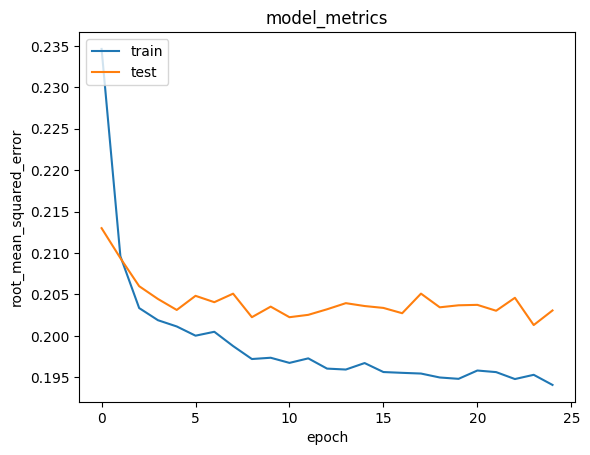

In [54]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Grafik di atas menampilkan tren metrik Root Mean Squared Error (RMSE) untuk data pelatihan (train) dan data validasi (test) selama 25 epoch. Pada data pelatihan, RMSE menunjukkan penurunan yang konsisten seiring bertambahnya jumlah epoch, yang mengindikasikan bahwa model semakin memahami pola data dan mampu memprediksi dengan lebih akurat. Sementara itu, RMSE pada data validasi cenderung stabil setelah beberapa epoch awal, menunjukkan bahwa model tidak mengalami overfitting secara signifikan. Selisih antara RMSE data pelatihan dan validasi juga tetap kecil, menandakan bahwa model memiliki kemampuan generalisasi yang baik terhadap data validasi. Secara keseluruhan, grafik ini menunjukkan bahwa model belajar dengan baik dan mampu memprediksi preferensi pengguna secara efektif dalam sistem rekomendasi film.









## Mendapatkan Rekomendasi
Menyiapkan data yang akan digunakan dalam memberikan rekomendasi film kepada pengguna tertentu

In [55]:
movie_df = movie_new
df = pd.read_csv('movie-recommendation-data/ml-latest-small/ratings.csv')


user_id = df.userId.sample(1).iloc[0]
movie_watched_by_user = df[df.userId == user_id]


movie_not_watched = movie_df[~movie_df['id'].isin(movie_watched_by_user.movieId.values)]['id']
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)

movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

# Menampilkan Rekomendasi Film untuk Pengguna

Kode ini digunakan untuk menghasilkan rekomendasi film berdasarkan hasil prediksi model sistem rekomendasi. Proses dimulai dengan memprediksi rating untuk setiap film yang belum ditonton oleh pengguna menggunakan model.predict pada array input user_movie_array. Hasil prediksi ini kemudian diratakan dengan flatten untuk mempermudah manipulasi data. Selanjutnya, indeks dari 10 film teratas dengan prediksi rating tertinggi diambil menggunakan argsort.

In [56]:

ratings = model.predict(user_movie_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('movie with high ratings from user')
print('----' * 8)

top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.movie_name, ':', row.genre)

print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)

recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.movie_name, ':', row.genre)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Showing recommendations for users: 318
movie with high ratings from user
--------------------------------
Natural Born Killers (1994) : Action|Crime|Thriller
Woman Under the Influence, A (1974) : Drama
--------------------------------
Top 10 movie recommendation
--------------------------------
His Girl Friday (1940) : Comedy|Romance
Secrets & Lies (1996) : Drama
Streetcar Named Desire, A (1951) : Drama
Paths of Glory (1957) : Drama|War
Ran (1985) : Drama|War
Kolya (Kolja) (1996) : Comedy|Drama
Yojimbo (1961) : Action|Adventure
Guess Who's Coming to Dinner (1967) : Drama
Witness for the Prosecution (1957) : Drama|Mystery|Thriller
Neon Genesis Evangelion: The End of Evangelion (Shin seiki Evangelion Gekijô-ban: Air/Magokoro wo, kimi ni) (1997) : Action|Animation|Drama|Fantasy|Sci-Fi
